In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
df = pd.read_csv("Melate.csv")#,parse_dates=[['FECHA']])

#check the dtypes
df.dtypes

NPRODUCTO     int64
CONCURSO      int64
R1            int64
R2            int64
R3            int64
R4            int64
R5            int64
R6            int64
R7            int64
BOLSA         int64
FECHA        object
dtype: object

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [6]:
df1 = df[['R1','FECHA']]
df['FECHA'] = pd.to_datetime(df['FECHA'])
df1.index = df1.FECHA
#df1 = df1.set_index('datetime')
df1 = df1.drop(['FECHA'], axis=1)
df1

,R1
FECHA,
2019-06-03,9
2019-03-03,9
2019-02-27,21
2019-02-24,5
2019-02-20,7
2019-02-17,6
2019-02-13,11
2019-10-02,3
2019-06-02,2


In [3]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
coint_johansen(df1,-1,1).eig

NameError: name 'df1' is not defined

In [ ]:
df1.resample('D').mean()


In [ ]:
import numpy as np
ts_log = np.log(df1)
plt.plot(ts_log)

moving_avg =  ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

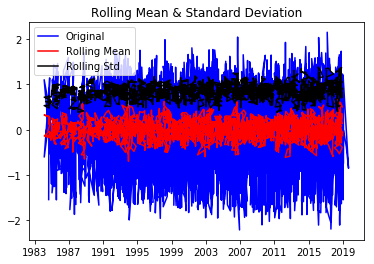

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [9]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
#plt.plot(expwighted_avg, color='red')


In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [4]:
from statsmodels.tsa.arima_model import ARIMA

ts_log_diff = ts_log - ts_log.shift()
#plt.plot(ts_log_diff)

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
#plt.plot(ts_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
results_ARIMA.fittedvalues*100

print(ts_log)

NameError: name 'ts_log' is not defined

In [ ]:
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
http://danlec.com/st4k#questions/46671589
https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean
https://stackoverflow.com/questions/53576443/attributeerror-module-pandas-has-no-attribute-ewma